
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()



df = pdr.get_data_yahoo("^NSEI", start="2020-11-1", end="2023-09-01")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,11697.349609,11725.650391,11557.400391,11669.150391,11669.150391,568400
2020-11-03,11734.450195,11836.200195,11723.299805,11813.500000,11813.500000,674300
2020-11-04,11783.349609,11929.650391,11756.400391,11908.500000,11908.500000,667300
2020-11-05,12062.400391,12131.099609,12027.599609,12120.299805,12120.299805,632500
2020-11-06,12156.650391,12280.400391,12131.849609,12263.549805,12263.549805,576800


In [18]:
## Cleaning up the data
df=df.filter(["Date","Close"])
df.columns = ["stock-price"]
df.head()

,stock-price
Date,
2020-11-02,11669.150391
2020-11-03,11813.500000
2020-11-04,11908.500000
2020-11-05,12120.299805
2020-11-06,12263.549805


In [19]:
df['sentiment'] = np.random.uniform(-1, 1, size=len(df))



## Step 2: Visualize the Data

<Axes: xlabel='Date'>

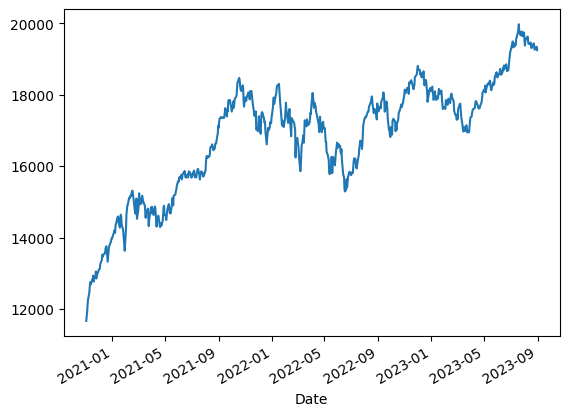

In [22]:
df['stock-price'].plot()

In [3]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller



# Dickey Fuller Test to check stationarity







In [4]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    return result[1]

In [10]:
df[f'differencing {0}'] = df['stock-price']

# Find the number of differencing needed to make time series data Staitionary -D

In [11]:
d = 0
while(True):
  if adfuller_test(df[f'differencing {d}'].dropna()) <= 0.05:
    break
  else :
    d = d+1
    df[f'differencing {d}'] = df[f'differencing {d-1}'] - df[f'differencing {d-1}'].shift(1)
    df[f'differencing {d}'] = df[f'differencing {d}'].dropna()

print("\n")
print("the number of differencing needed to make time series data Staitionary - D is : ", d)



ADF Test Statistic : -2.588124358522911
p-value : 0.09547664562565866
#Lags Used : 3
Number of Observations Used : 698
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -16.55386787285736
p-value : 1.9341900270979912e-29
#Lags Used : 2
Number of Observations Used : 698
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


the number of differencing needed to make time series data Staitionary - D is :  1


### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

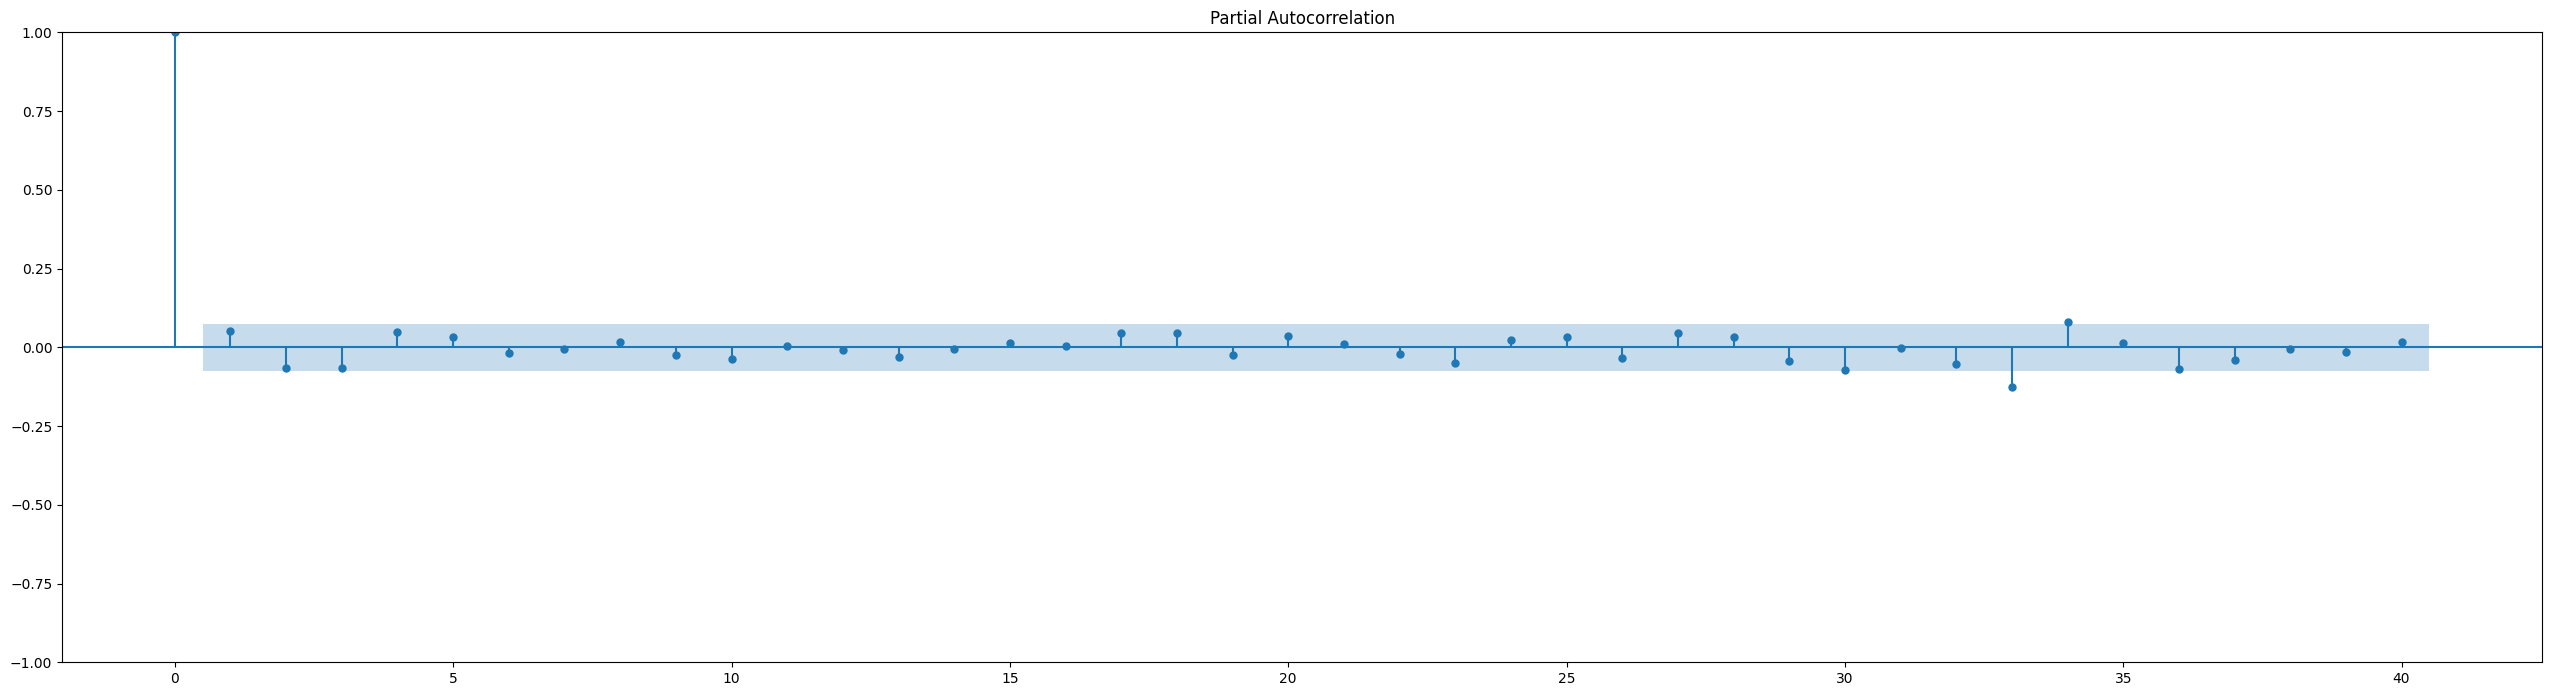

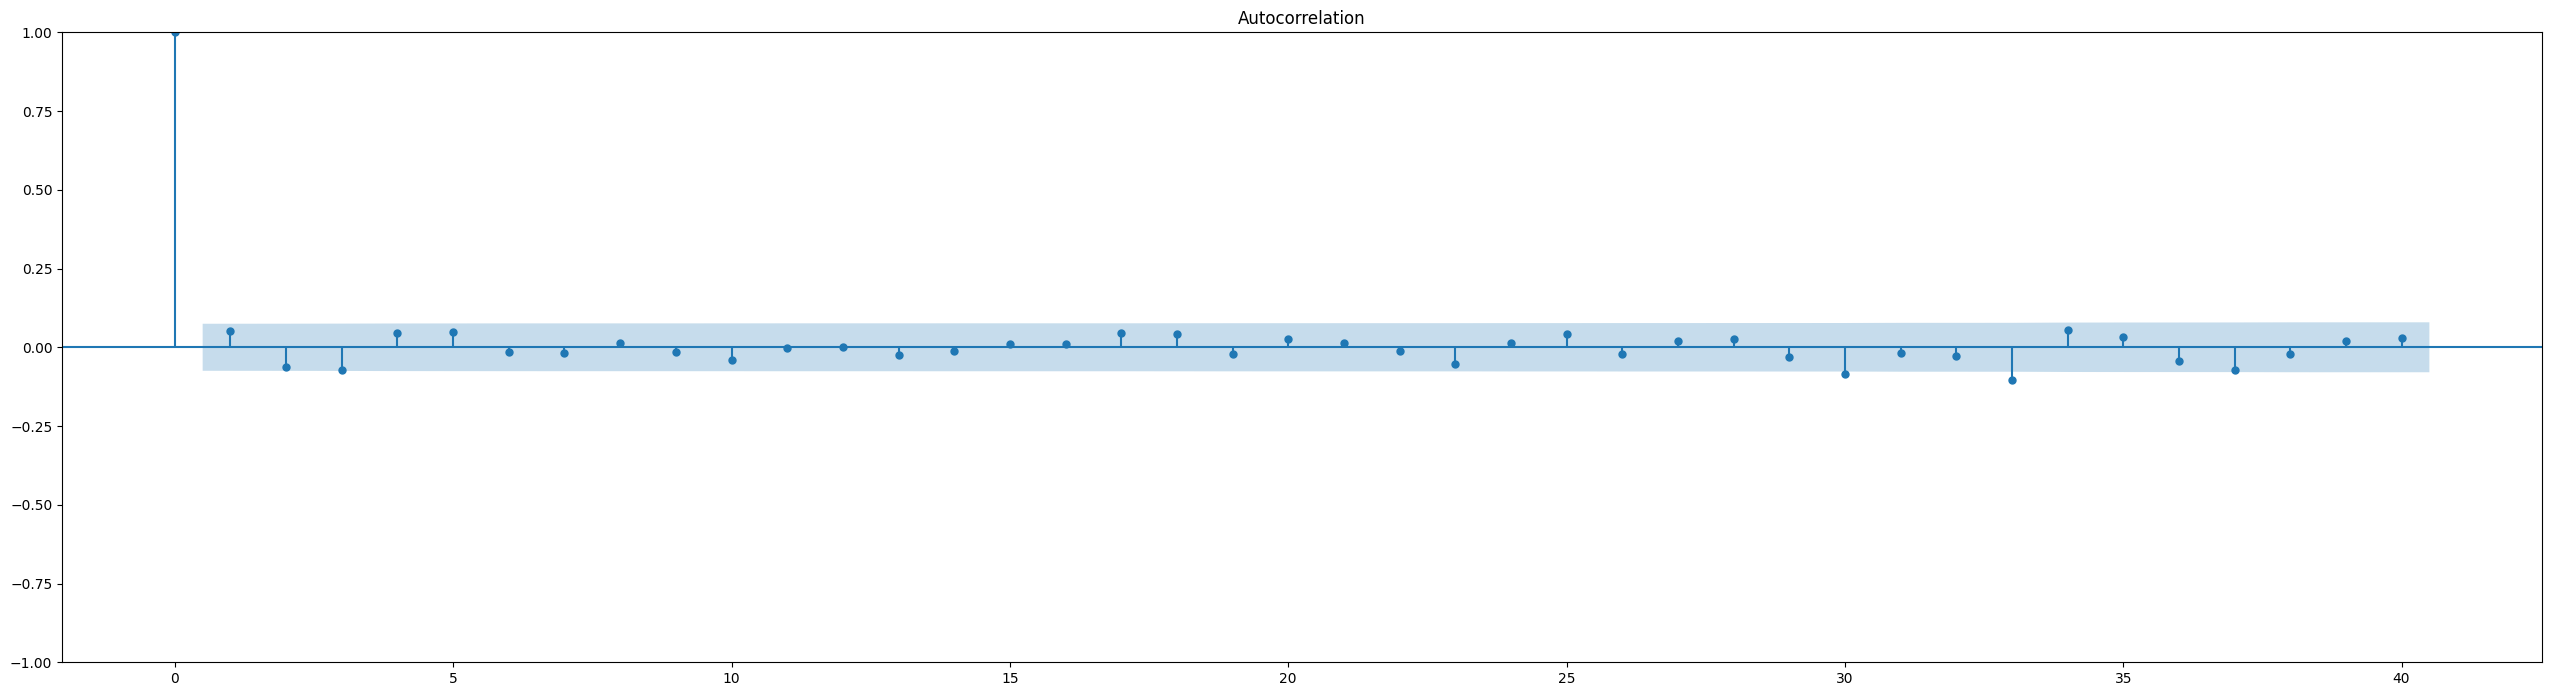

In [14]:
fig = plt.figure(figsize=(32,18))

ax1 = fig.add_subplot(212)
fig = plot_pacf(df[f'differencing {1}'].iloc[13:],lags=40,ax=ax1)

fig = plt.figure(figsize=(32,18))
ax2 = fig.add_subplot(211)
fig = plot_acf(df[f'differencing {1}'].iloc[13:],lags=40,ax=ax2)





In [24]:
data = df

In [21]:
data = df.filter(['stock-price', ])

In [22]:
data.head()

,stock-price
Date,
2020-11-02,11669.150391
2020-11-03,11813.500000
2020-11-04,11908.500000
2020-11-05,12120.299805
2020-11-06,12263.549805


In [25]:
train_arima, test_arima = data[0:-73], data[-73:]


In [26]:
history = [x for x in train_arima['stock-price']]
hist_sentiment = [x for x in train_arima['sentiment']]
y_stock = test_arima['stock-price']
y_sentiment = test_arima['sentiment']
predictions = list()

In [28]:
import statsmodels.tsa.api as smt

In [33]:
model_fit = smt.ARIMA(history, exog = hist_sentiment, order=(1,1,1)).fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  629
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4081.397
Date:                Sat, 04 May 2024   AIC                           8170.793
Time:                        12:12:47   BIC                           8188.563
Sample:                             0   HQIC                          8177.697
                                - 629                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.8240      7.384     -1.060      0.289     -22.297       6.649
ar.L1         -0.1583      0.586     -0.270      0.787      -1.306       0.990
ma.L1          0.2218      0.583      0.380      0.704      -0.921       1.365
sigma2       2.59e+04   1081.192     23.958      0.000    2.38e+04     2.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               109.42
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.38
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])


for i in range(1, len(y)):
    model_fit =  smt.ARIMA(history, order=(1,1,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

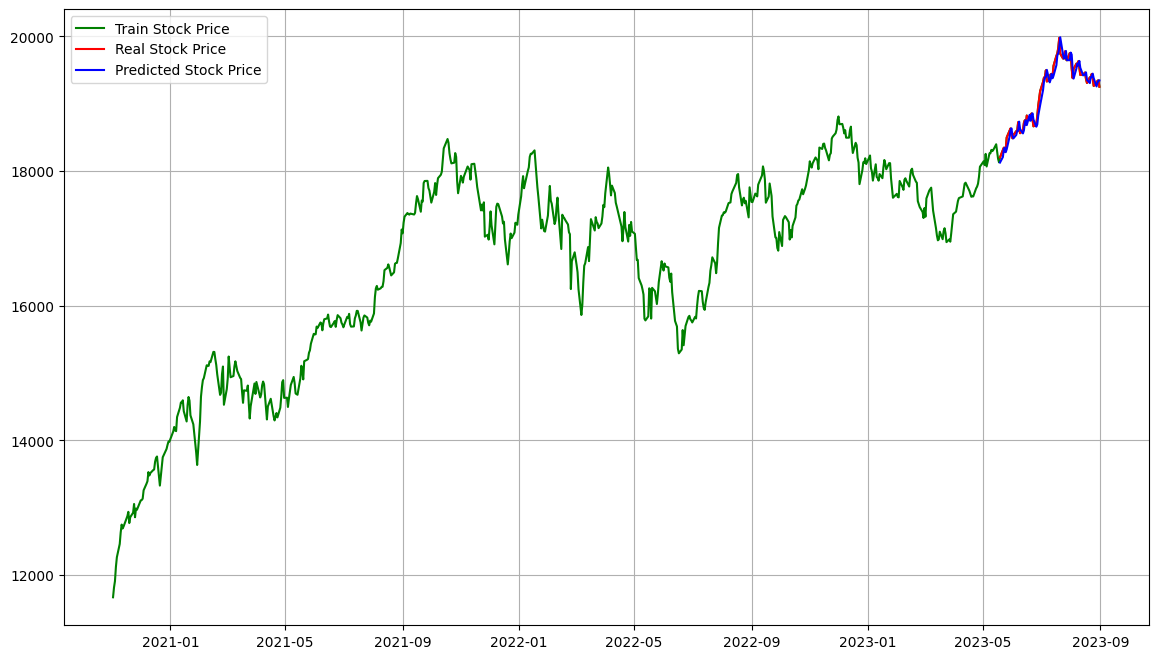

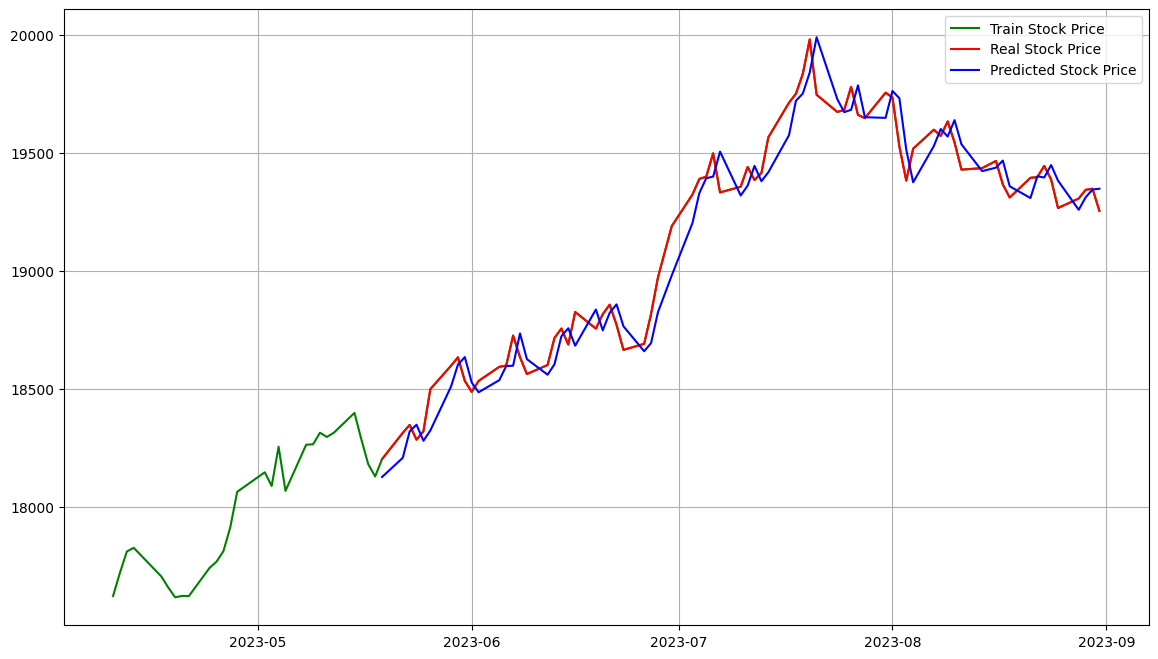

MSE: 9052.11444500357
MAE: 79.6973720590028
RMSE: 95.14260057935967


In [ ]:
plt.figure(figsize=(14,8))
plt.plot(data.index, data['stock-price'], color='green', label = 'Train Stock Price')
plt.plot(y.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['stock-price'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(data.index[-73:], data['stock-price'].tail(73), color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)

plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(math.sqrt(mean_squared_error(y, predictions))))